In [ ]:
!nvidia-smi

Thu Nov 13 04:53:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
img = image.load_img('/content/drive/MyDrive/training/happy/k3.jpg')

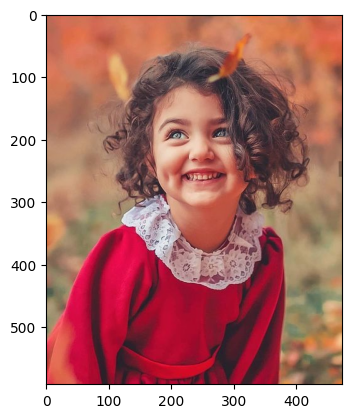

In [ ]:
plt.imshow(img)

array([[[192, 205, 251],
        [192, 205, 251],
        [192, 205, 249],
        ...,
        [173, 205, 254],
        [173, 205, 254],
        [173, 205, 254]],

       [[ 95, 107, 161],
        [ 94, 108, 161],
        [ 95, 107, 161],
        ...,
        [ 89, 119, 184],
        [ 91, 119, 184],
        [ 89, 119, 184]],

       [[ 98, 110, 182],
        [ 96, 111, 180],
        [ 98, 110, 180],
        ...,
        [ 86, 111, 209],
        [ 87, 110, 210],
        [ 86, 110, 210]],

       ...,

       [[ 51,  11, 200],
        [105,  66, 252],
        [104,  69, 249],
        ...,
        [ 59, 122, 214],
        [ 57, 121, 215],
        [ 55, 122, 215]],

       [[ 60,  21, 207],
        [113,  75, 255],
        [101,  66, 246],
        ...,
        [ 57, 122, 220],
        [ 52, 119, 218],
        [ 51, 119, 218]],

       [[ 68,  29, 215],
        [120,  82, 255],
        [ 99,  64, 244],
        ...,
        [ 57, 124, 223],
        [ 54, 121, 224],
        [ 52, 121, 224]]], dtype=uint8)
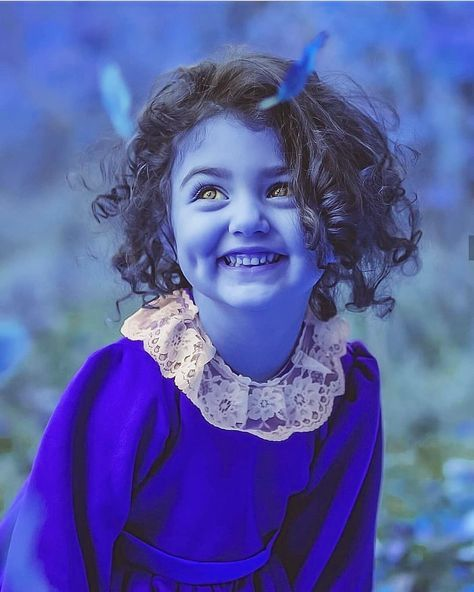

In [ ]:
i1 = cv2.imread('/content/drive/MyDrive/training/happy/k3.jpg')
i1

In [ ]:
i1.shape

(592, 474, 3)

In [ ]:
train  = ImageDataGenerator(rescale=1/200)
validation = ImageDataGenerator(rescale=1/200)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/training',
                                          target_size = (200,200),
                                          batch_size = 32,
                                          class_mode = 'binary')
validation = validation.flow_from_directory('/content/drive/MyDrive/validation',
                                            target_size = (200,200),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 15 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy',
               optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
               metrics = ['accuracy']
               )

In [ ]:
model_fit = model.fit(train_dataset,epochs=15)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4000 - loss: 0.6956
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.6000 - loss: 9.7450
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.4000 - loss: 1.7320
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.8000 - loss: 0.6781
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6000 - loss: 0.6328
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.8667 - loss: 0.6071
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.6000 - loss: 0.5726
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 1.0000 - loss: 0.5709
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.6000 - loss: 0.5328
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 1.0000 - loss: 0.5398
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.7333 - loss: 0.4510
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.9333 - loss:

In [ ]:
dir_path = '/content/drive/MyDrive/testing'
for i in os.listdir(dir_path):
  print(i)


imgN4.png
imgN3.png
s1.jpg
k.jpg
k1.jpg
s5.avif
s3.avif
k3.jpg
s4.jpg
k4.jpg
s2.webp
imgN1.png
img2.png
k5.jpg
img3.png
img4.png


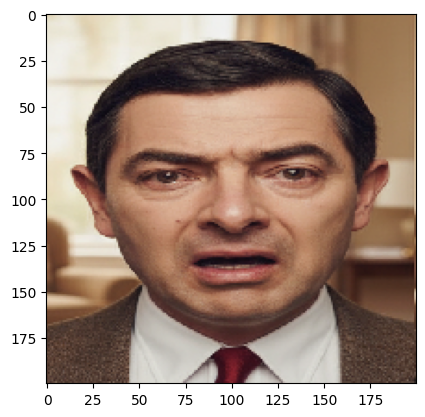

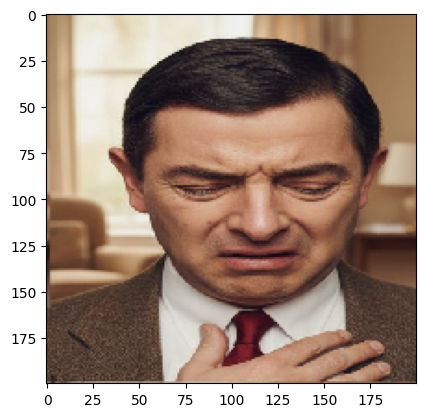

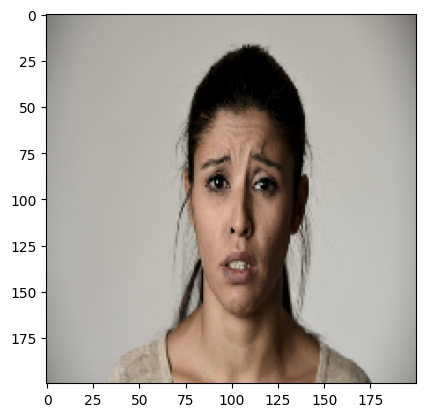

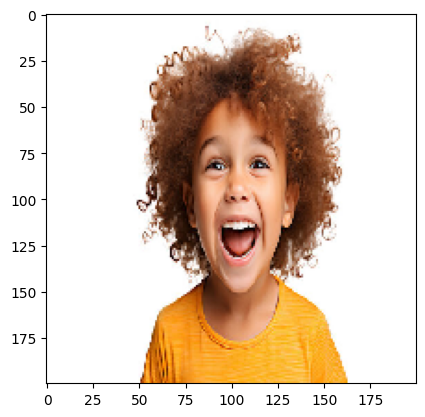

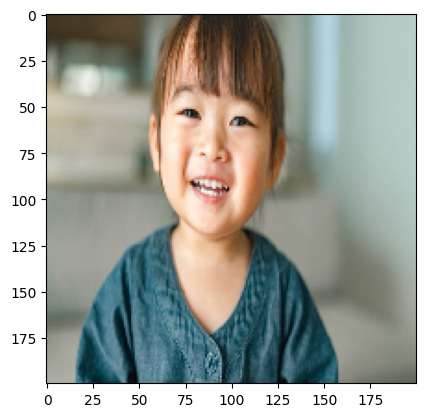

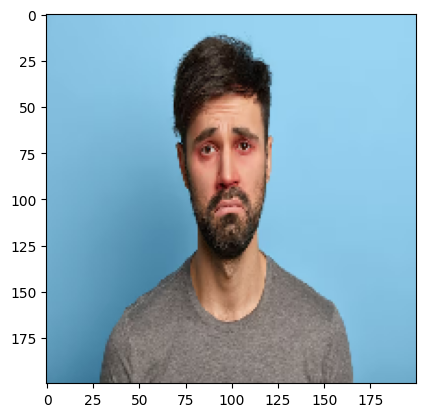

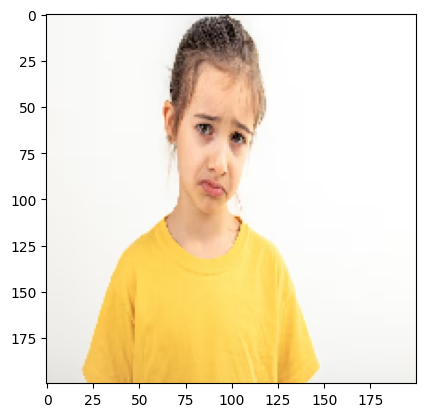

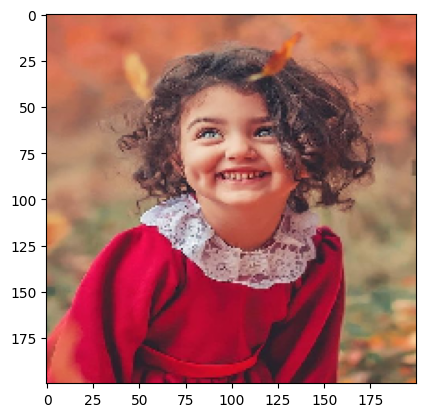

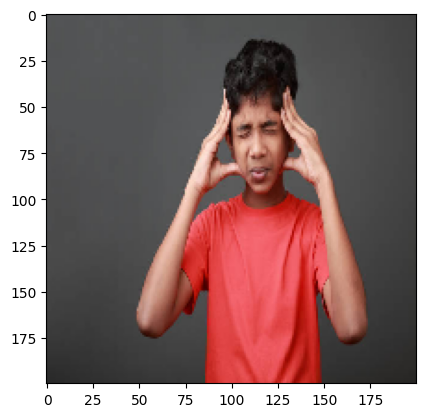

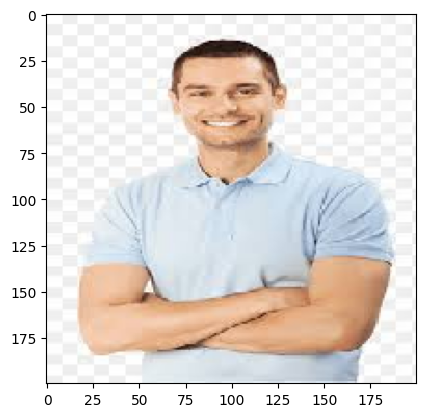

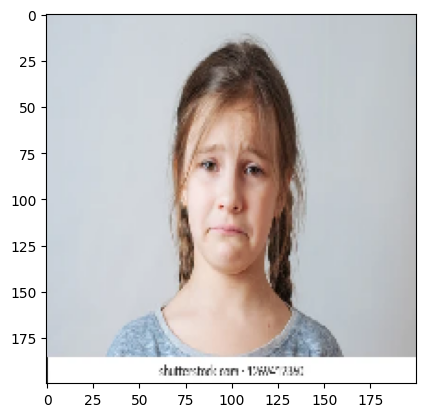

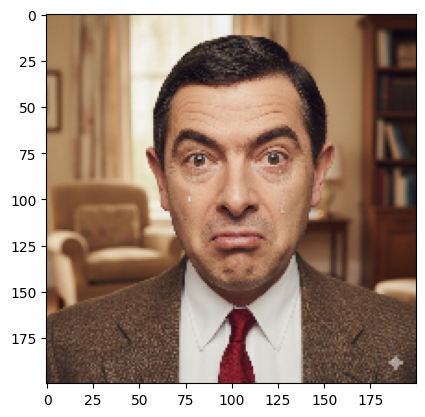

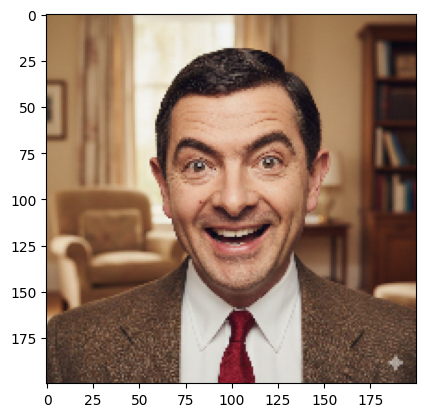

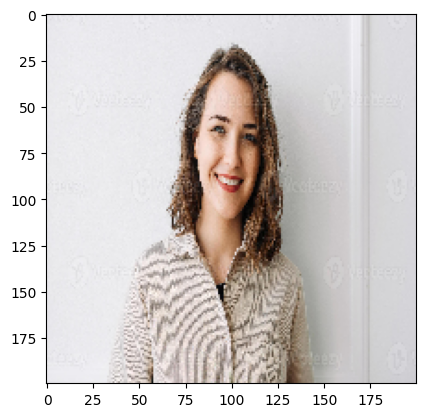

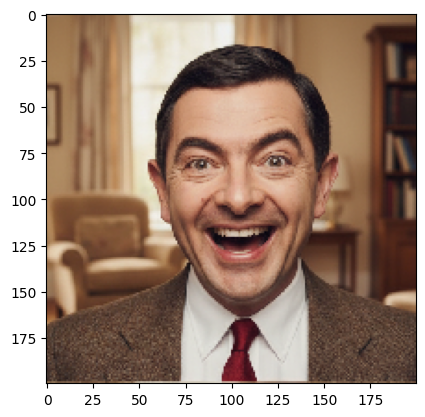

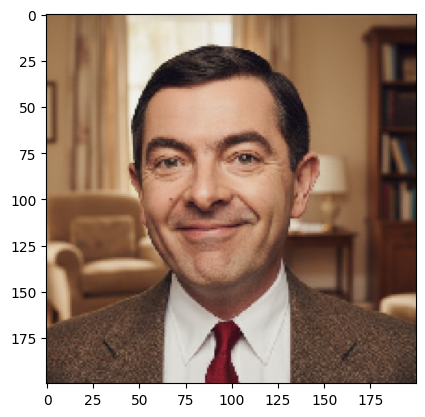

In [ ]:
dir_path = '/content/drive/MyDrive/testing'
for i in os.listdir(dir_path):
     img = image.load_img(dir_path+'//'+i,target_size=(200,200))
     plt.imshow(img)
     plt.show()


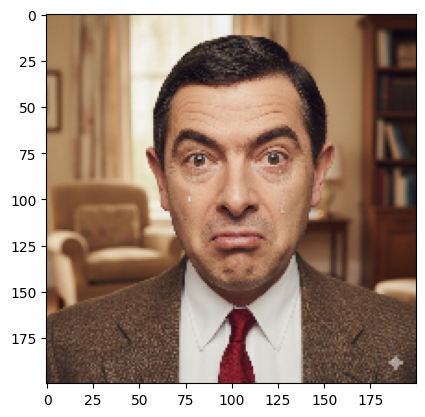

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step
i am not happy


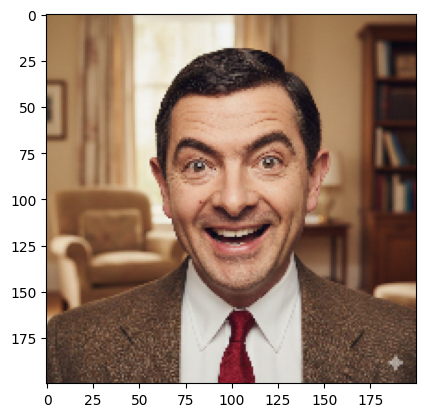

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
i am happy


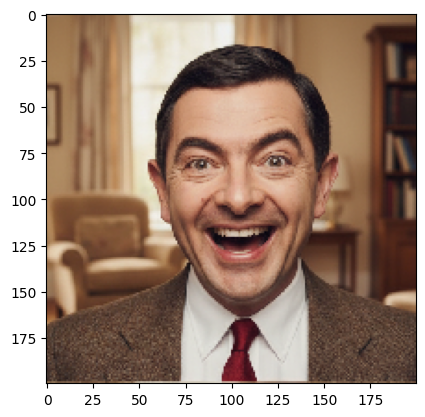

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
i am happy


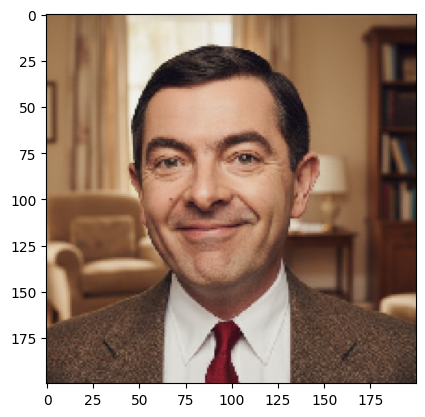

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
i am happy


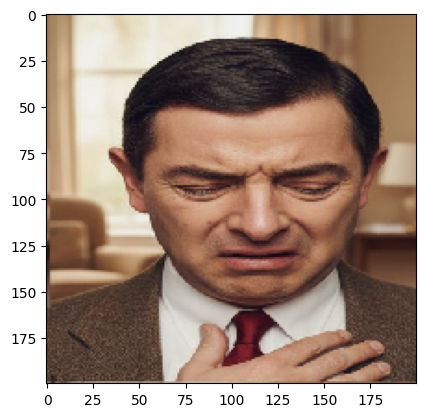

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
i am not happy


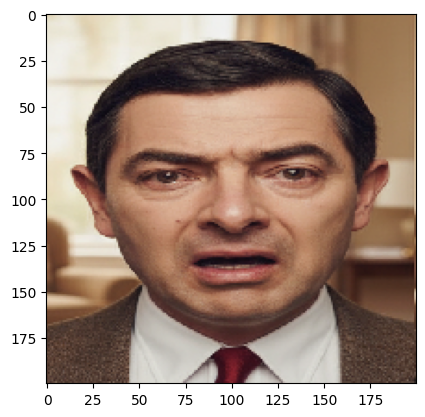

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
i am not happy


In [ ]:
dir_path = '/content/drive/MyDrive/testing'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size=(200, 200))
  plt.imshow(img)
  plt.show()

  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])

  val = model.predict(images)
  if val == 0:
    print("i am happy")
  else:
    print("i am not happy")


In [ ]:
!nvidia-smi

Thu Nov 13 04:37:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P0             31W /   70W |    1146MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from PIL import Image
import numpy as np
import gradio as gr

def predict_mood(image):
  img = image.resize((200,200))
  x = np.array(img)
  x = np.expand_dims(x,axis=0)
  x = x
  val = model.predict(x)[0][0]

  if val < 0.5:
      return "Happy"
  else:
      return "Not happy"

In [ ]:
iface = gr.Interface(fn=predict_mood,
                     inputs = gr.Image(type='pil',label="Upload an Image"),
                     outputs = gr.Text(label="Predict MOod"),
                     title = "Mood Classification (Happy/Not happy)",
                     description = "Upload an image to classify if the person is happy or not happy")

iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4a2096cf257a8cfcbf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
